# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

In [2]:
mydata = pd.read_table("/Users/ijiseon/Desktop/chipotle.tsv")

In [7]:
mydata.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 3. Assign it to a variable called chipo.

In [3]:
chipo = mydata.copy()

### Step 4. See the first 10 entries

In [9]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [32]:
chipo.groupby(by="item_name")["quantity"].sum().sort_values(ascending=False).head(10)

item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64

In [29]:
chipo["item_name"].value_counts().head(10)

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [53]:
top5 = pd.DataFrame(chipo["item_name"].value_counts().head(5))

In [61]:
top5

,item_name
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301


In [60]:
top5.shape

(5, 1)

In [64]:
top5["item_name"] = pd.to_numeric(top5["item_name"])

In [66]:
top5=top5.reset_index()

In [67]:
top5

,index,item_name
0,Chicken Bowl,726
1,Chicken Burrito,553
2,Chips and Guacamole,479
3,Steak Burrito,368
4,Canned Soft Drink,301


<AxesSubplot:xlabel='index'>

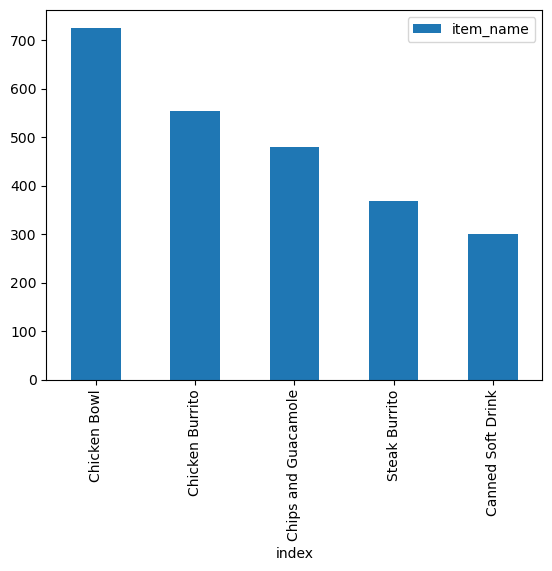

In [68]:
top5.plot.bar(x="index",y="item_name")

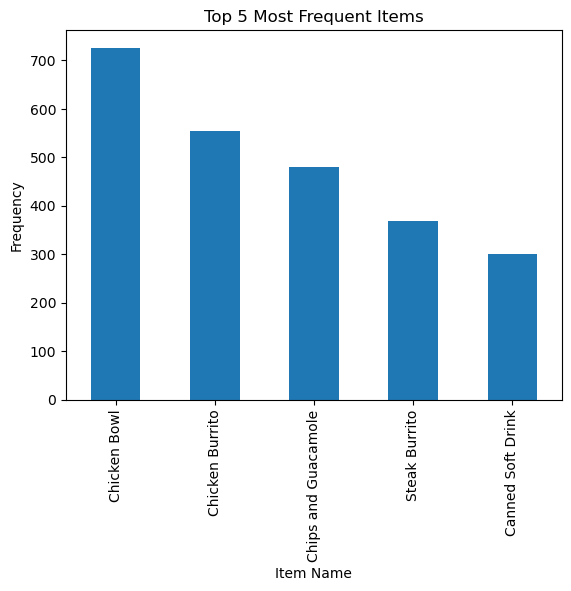

In [4]:
# 다른 팀원들 해결방식
data = chipo.item_name.value_counts().head(5)
data.plot(kind='bar')

plt.xlabel('Item Name')
plt.ylabel('Frequency')
plt.title('Top 5 Most Frequent Items')
plt.show()


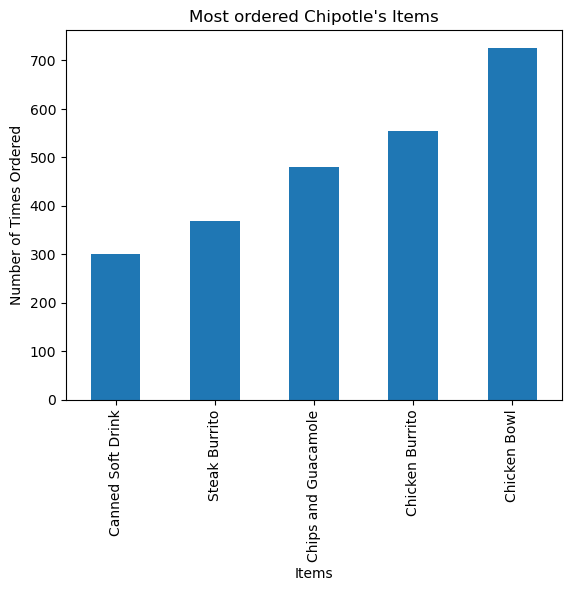

In [5]:
#과제 솔루션 답

# get the Series of the names
x = chipo.item_name

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# sort the values from the top to the least value and slice the first 5 items
df = df[0].sort_values(ascending = True)[45:50]

# create the plot
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [69]:
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price]

In [70]:
orders = chipo.groupby("order_id").sum()

In [71]:
orders

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


Text(0, 0.5, 'Items ordered')

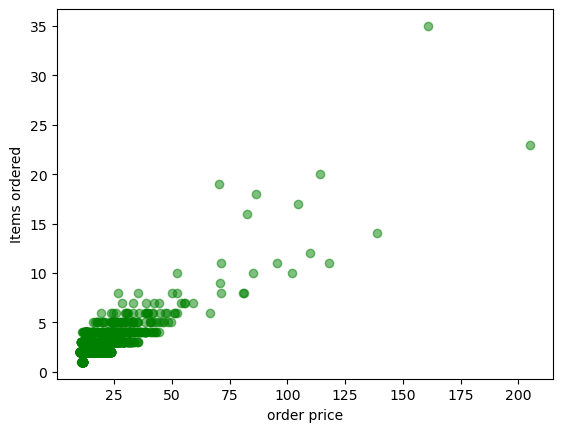

In [73]:
plt.scatter(x=orders.item_price,y=orders.quantity,alpha=0.5,c="green")
plt.xlabel("order price")
plt.ylabel("Items ordered")

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [75]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [81]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [83]:
chipo["realprice"] = chipo["item_price"]/chipo["quantity"]

In [84]:
chipo

,order_id,quantity,item_name,choice_description,item_price,realprice
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [86]:
chipo.groupby("item_name")["realprice"].aggregate([min,np.mean,max])

,min,mean,max
item_name,,,
6 Pack Soft Drink,6.49,6.490000,6.49
Barbacoa Bowl,8.69,10.187273,11.75
Barbacoa Burrito,8.69,9.832418,11.75
Barbacoa Crispy Tacos,8.99,10.087273,11.75
Barbacoa Salad Bowl,9.39,10.640000,11.89
Barbacoa Soft Tacos,8.99,10.018400,11.75
Bottled Water,1.09,1.431667,1.50
Bowl,7.40,7.400000,7.40
Burrito,7.40,7.400000,7.40


In [89]:
chipoprice = pd.DataFrame(chipo.groupby("item_name")["realprice"].aggregate([min,np.mean,max]))

In [91]:
chipoprice = chipoprice.reset_index()

In [93]:
chipoprice["sad"] = chipoprice["max"]-chipoprice["min"]

In [95]:
chipoprice["sad"]=round(chipoprice["sad"],1)

In [97]:
chipoprice.sort_values(by="sad",ascending=False)

,item_name,min,mean,max,sad
1,Barbacoa Bowl,8.69,10.187273,11.75,3.1
12,Carnitas Burrito,8.69,9.975932,11.75,3.1
2,Barbacoa Burrito,8.69,9.832418,11.75,3.1
39,Steak Burrito,8.69,9.993424,11.75,3.1
18,Chicken Burrito,8.19,9.475949,11.25,3.1
17,Chicken Bowl,8.19,9.657727,11.25,3.1
40,Steak Crispy Tacos,8.69,9.952857,11.75,3.1
38,Steak Bowl,8.69,10.232559,11.75,3.1
22,Chicken Soft Tacos,8.49,9.240261,11.25,2.8
20,Chicken Salad,8.19,9.010000,10.98,2.8


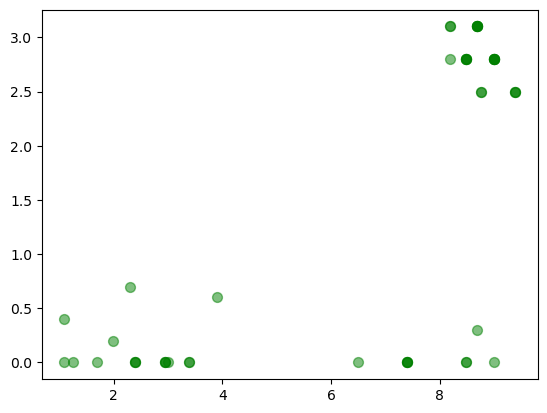

In [99]:
plt.scatter(x=chipoprice["min"], y=chipoprice["sad"], s=50, c="green", alpha=0.5)

## 물품값이 기본적으로 쌀수록 해당 물품을 산 사람들의 가격 변동폭이 좁다는 것을 알 수 있다